# Intro to cheminformatics with RDkit


<div class="alert alert-block alert-info">
<h2>Objectives:</h2>

* Import packages/libraries

* Review basic data types
    * string (str): text characters
    * integer (int): whole number
    * floating point number (float): number with a decimal

* New data types:
    * dictionary

* SMILES strings

* RDKit library

* Run and define functions
    * `Chem.MolFromSmiles()`
    * `Chem.Draw.MolToImage()`
    * `Descriptors.ExactMolWt()`
    


</div>

There are Python libraries that are made for working just with chemical data. One commonly used library in Python for data science (or cheminformatics) is called [RDKit](https://en.wikipedia.org/wiki/RDKit).

RDKit provides a molecule object that allows you to manipulate chemical structures. It has capabilities for reading and writing molecular file formats, calculating molecular properties, and performing substructure searches. In addition, it offers a wide range of cheminformatics algorithms such as molecular fingerprint generation, similarity metrics calculation, and molecular descriptor computation. This notebook will only introduce a few RDKit basics.

<div class="alert alert-block alert-success"> 
<strong>Python Skills: Python Objects</strong>

Most of this functionality is achieved through the RDKit `mol` object. In Python, we use the word "object" to refer to a variable type with associated data and methods. 
One example of an object we have seen in notebooks is a list - we could also call it a "list object". An object has `attributes` (data) and `methods`. 
You access information about objects with the syntax
```python
object.data
```
where data is the attribute name.

You acceess object methods with the syntax
```python
object.method(arguments)
```

For example, for a list "`append` is a method that was covered in the introductory lesson.

```
my_list = []
my_list.append(1) # "append" is a method
```
</div>    

## Simplified Molecular-Input Line-entry System: SMILES 

SMILES stands for "Simplified Molecular-Input Line-Entry System" and is a way to represent molecules as a string of characters.

Consider the molecule ethanol. The image below shows a representation that we are used to seeing in chemistry:

![ethanol](images/ethanol.png)

However, the SMILES representation of this molecule would be "CCO".

You can read more about SMILES at [this tutorial](https://archive.epa.gov/med/med_archive_03/web/html/smiles.html), but rules for atoms and bonds are also repeated below.

### Atoms
SMILES supports all elements in the periodic table. An atom is represented using its respective atomic symbol. Upper case letters refer to non-aromatic atoms; lower case letters refer to aromatic atoms. If the atomic symbol has more than one letter the second letter must be lower case.

### Bonds
```
-	Single bond
=	Double bond
#	Triple bond
*	Aromatic bond
.	Disconnected structures
```
Single bonds are the default and therefore need not be entered. For example, 'CC' would mean that there is a non-aromatic carbon attached to another non-aromatic carbon by a single bond, and the computer would identify the structure as the chemical ethane. It is also assumed that the bond between two lower case atom symbols is aromatic. A blank terminates the SMILES string.

### Branches

A branch from a chain is specified by placing the SMILES symbol(s) for the branch between parenthesis. Some examples:

```

CC(O)C	2-Propanol
CC(=O)C	2-Propanone
```

### Rings

A ring is specified by placing a number directly after the SMILES symbol where the ring closure occurs. This number acts as a marker, indicating that the atoms with the same number are connected, thus forming a ring. For instance:

```
C1CCCC1 cyclopentane
n1ccccc1	Pyridine
```

### SMILES Examples

<div style="text-align:center;">
  <img src="images/smiles_example_1.png" style="display: block; margin: 0 auto; max-height:300px;">
</div>

<div style="text-align:center;">
  <img src="images/smiles_example_2.png" style="display: block; margin: 0 auto; max-height:300px;">
</div>

### Using Online Resources
Most of the time, you will not need to write a SMILES string by hand. You will be able to look up a molecule's SMILES string from a web database like [PubChem](https://pubchem.ncbi.nlm.nih.gov/).

You can also use tools like this [molecule sketcher from the Protein Data Bank](https://www.rcsb.org/chemical-sketch)
to draw molecules and get their SMILES strings.

In this lesson, we will create and manipulate RDKit `mol` objects. RDKit `mol` objects represent molecules and have
attributes (data) and methods (actions) associated with molecules.

We are going to use a part of RDKit called `Chem`. To use `Chem`, we first have to import it. 

In [2]:
import rdkit
from rdkit import Chem

## Creating Molecules with RDKit

Throughout this tutorial, it will be helpful to have access to the [RDKit documentation](https://www.rdkit.org/docs/index.html). 

To get information about molecules in RDKit, we have to first create objects representing molecules. We will use SMILES strings to create our `mol` objects, though RDKit also has methods for creating molecules from the file formats.

### Creating molecules using SMILES

We can create a representation of ibuprofen using RDKit by using the `MolFromSmiles` function in `rdkit.Chem`.

In [3]:
ibuprofen_smiles = 'CC(Cc1ccc(cc1)C(C(=O)O)C)C'

print(ibuprofen_smiles)
type(ibuprofen_smiles)


CC(Cc1ccc(cc1)C(C(=O)O)C)C


str

In [4]:
ibuprofen = Chem.MolFromSmiles(ibuprofen_smiles)

Let's explore the output of the `Chem.MolFromSmiles()` function using the `print()` and `type()` functions.

In [5]:
print(ibuprofen)
type(ibuprofen)

rdkit.Chem.rdchem.Mol

The `print()` function doesn't known how to represent this object. Instead it informed us that the variable `ibuprofen` is an RDkit `mol` object that is stored in our computers memory at a hexadecimal address.

We need to use the RDkit methods to interact with the `mol` object. We can visualize the molecule using the `Chem.Draw.MolToImage()` function.

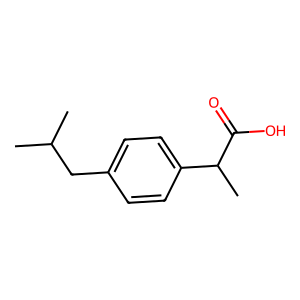

In [13]:
Chem.Draw.MolToImage(ibuprofen)

Luckily, Jupyter is smart, so we can also display a `mol` object by putting it as the last thing in a cell.

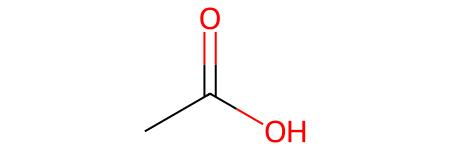

In [22]:
acetic_acid = Chem.MolFromSmiles("CC(=O)O")
acetic_acid

## Working with RDKit Molecules

RDKit molecule objects have a number of methods we can use to get more information about the molecule.
In the next few cells, we'll look at some methods that can tell us some things about the molecules we've created.

<div class="alert alert-block alert-success"> 
<strong>Jupyter Skills: The Tab Key</strong>

When working with Python objects in the Jupyter notebook, you can type a variable or object name to see the methods available on that object.

In the cell below, type `ibuprofen.` (include a (`.`) at the end), then press the `tab` key. 
A list of possible methods and attributes will come up.

Look through the methods until you find one that gives you the number of atoms in the molecule.

</div>

**NOTE:** Methods are functions so they require parentheses at the end.

```python
object.method()
```

In [27]:
# Pick a method that will determine the number of atom in ibuprofen.

acetic_acid.GetNumAtoms()

4

<div class="alert alert-block alert-success"> 
<strong>Python Skills: Getting Help</strong>

Is this the number of atoms you expected for a acetic_acid molecule? 

We can use the `help` function on the method you found in the previous step to find a method argument to figure out a method argument to get the number of atoms we expect.

</div>

In [33]:
help(acetic_acid.GetNumAtoms)

Help on method GetNumAtoms:

GetNumAtoms(...) method of rdkit.Chem.rdchem.Mol instance
    GetNumAtoms( (Mol)self [, (int)onlyHeavy=-1 [, (bool)onlyExplicit=True]]) -> int :
        Returns the number of atoms in the molecule.

          ARGUMENTS:
            - onlyExplicit: (optional) include only explicit atoms (atoms in the molecular graph)
                            defaults to 1.
          NOTE: the onlyHeavy argument is deprecated


        C++ signature :
            int GetNumAtoms(RDKit::ROMol [,int=-1 [,bool=True]])



In [34]:
# Add an argument to your function to get the number of 
# atoms that gives you the total number of atoms in acetic_acid
# including hydrogens
acetic_acid.GetNumAtoms(onlyExplicit=False)

8

Each molecule is made up of RDKit atom objects and RDKit bond objects.
If we want to get the atoms for a particular molecule, we can use the `GetAtoms` method.

## Molecular Descriptors

A molecular descriptor is a numerical value that represents some property of a molecule.

Descriptors can be 0 dimensional (molecular weight, number of heavy atoms, etc.), 1 dimensional (counts of atom types, hydrogen bond donors/acceptors), 2 dimensional (fingerprints, other graph representations), 3 dimensional (polar surface area).

RDKit supports the calculation of many molecular descriptors. You can see a [full list of RDKit descriptors](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors) or [see the module documentation](https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html).

To get molecular descriptors from RDKit, we import the `rdMolDescriptors` module.

```python
from rdkit.Chem import rdMolDescriptors
```

To get a descriptor, you do:

```python
rdMolDescriptors.descriptor_name(molecule_variable)

```

For example, we can calculate the molecular weight of our ibuprofen molecule

In [31]:
from rdkit.Chem import rdMolDescriptors

ibuprofen_mw = rdMolDescriptors.CalcExactMolWt(ibuprofen)
print(ibuprofen_mw)

206.130679816


Here are some examples of other descriptors that RDkit can calculate.
____

`rdMolDescriptors.CalcExactMolWt((Mol)mol[, (bool)onlyHeavy=False]) → float :`

returns the molecule’s exact molecular weight

`rdMolDescriptors.CalcNumAtoms((Mol)mol) → int :`

returns the total number of atoms for a molecule

`rdMolDescriptors.CalcFractionCSP3((Mol)mol) → float :`

returns the fraction of C atoms that are SP3 hybridized

`rdMolDescriptors.CalcMolFormula((Mol)mol) → str :`

returns the molecule’s formula

`rdMolDescriptors.CalcNumAliphaticCarbocycles((Mol)mol) → int :`

returns the number of aliphatic (containing at least one non-aromatic bond) carbocycles for a molecule

`rdMolDescriptors.CalcNumAliphaticHeterocycles((Mol)mol) → int :`

returns the number of aliphatic (containing at least one non-aromatic bond) heterocycles for a molecule

`rdMolDescriptors.CalcNumAromaticRings((Mol)mol) → int :`

returns the number of aromatic rings for a molecule

`rdMolDescriptors.CalcNumAtomStereoCenters((Mol)mol) → int :`

Returns the total number of atomic stereocenters (specified and unspecified)

`rdMolDescriptors.CalcNumHBA((Mol)mol) → int :`

returns the number of H-bond acceptors for a molecule

`rdMolDescriptors.CalcNumHBD((Mol)mol) → int :`

returns the number of H-bond donors for a molecule
```

<div class="alert alert-block alert-warning"> 
<h3>Challenge</h3>

Write a function that uses function in the `rdMolDescritors` module to calculate >=3 properties for a molecule. The function should take a `mol` object as an argument and print the properties you calculate.

</div>

In [94]:
def get_properties(mol : rdkit.Chem.rdchem.Mol):
    MW = rdMolDescriptors.CalcExactMolWt(mol)
    HBD = rdMolDescriptors.CalcNumHBD(mol)
    HBA = rdMolDescriptors.CalcNumHBA(mol)
    ALOGP = rdMolDescriptors.CalcCrippenDescriptors(mol)[0]
    print(f'MW: {MW}, HBD: {HBD}, HBA: {HBA}, ALogP: {ALOGP}')

In [95]:
ibuprofen_properties = get_properties(ibuprofen)

MW: 206.130679816, HBD: 1, HBA: 1, ALogP: 3.073200000000001


# Iterator module

Can include if we have enough time

<div class="alert alert-block alert-success"> 
<strong>Python Skills: Iterators</strong>

When we look at the results of the `GetAtoms` method, it tells us that we have a `GetAtomsIterator`.
In Python, an iterator is an object that contains values that can be looped through and indexed in.

Although we haven't used this terminology before, a Python list is an example of an iterator.

</div>

Like a list, we can also call `len` on the iterator.

In [ ]:
len(acetic_acid_atoms)

4

Because `acetic_acid_atoms` is an iterator, we can use indexing to get a particular atom.
Atoms in RDKit molecules are represented by Atom objects.

In [ ]:
atom = acetic_acid_atoms[0]
atom

When we examine one atom, we see there that there are many methods associated with the atom. 
For example, we can print the atom element or atom hybridization.

In [ ]:
print(atom.GetSymbol())
print(atom.GetHybridization())

O
SP2


We can use a for loop to give information about each atom.

In [ ]:
for atom in acetic_acid_atoms:
    print(f"Atom {atom.GetSymbol()} has hybridization {atom.GetHybridization()}")

Atom C has hybridization SP3
Atom C has hybridization SP2
Atom O has hybridization SP2
Atom O has hybridization SP2


Bonds are also objects in RDKit, and we can iterate over them the same way we can iterate over atoms.

In [ ]:
acetic_acid_bonds = acetic_acid.GetBonds()
bond = acetic_acid_bonds[0]
bond.GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

<div class="alert alert-block alert-warning"> 
<h3>Challenge</h3>

Use a `for` loop to print information about each bond.
For each bond, you should print the starting atom symbol, the ending atom symbol,
and the bond type. 

Your output should look like the following:

```
Bond between C and C is a SINGLE bond.
Bond between C and O is a DOUBLE bond.
Bond between C and O is a SINGLE bond.
```

</div>

In [ ]:
for bond in acetic_acid_bonds:
    atom1 = bond.GetBeginAtom().GetSymbol()
    atom2 = bond.GetEndAtom().GetSymbol()
    print(f"Bond between {atom1} and {atom2} is a {bond.GetBondType()} bond.")